In [97]:
import pandas as pd
import numpy as np

In [98]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [99]:
import warnings
warnings.filterwarnings("ignore")

In [100]:
market_data = pd.read_csv("./data/Bitcoin Price Monthly 2022 to 2010.csv")
graph_parameters= pd.read_csv("./data/monthlyparameters.csv")[20:].reset_index().drop("index", axis=1)

In [101]:
market_data

,Date,Price,Open,High,Low,Vol.,Change %
0,Aug 2010,0.1,0.1,0.1,0.0,2.217400e+05,0.00
1,Sep 2010,0.1,0.1,0.2,0.1,2.168100e+05,0.00
2,Oct 2010,0.2,0.1,0.2,0.0,1.110000e+06,210.99
3,Nov 2010,0.2,0.2,0.5,0.1,8.262500e+05,0.00
4,Dec 2010,0.3,0.2,0.3,0.2,2.636500e+05,44.09
...,...,...,...,...,...,...,...
136,Dec 2021,46219.5,56891.7,59064.3,42587.8,1.900000e+06,-18.75
137,Jan 2022,38498.6,46217.5,47944.9,32985.6,2.030000e+06,-16.70
138,Feb 2022,43188.2,38475.6,45755.2,34357.4,1.820000e+06,12.18
139,Mar 2022,45525.0,43187.2,48199.0,37182.1,4.370000e+10,5.41


In [102]:
graph_parameters

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.990224,1.177700,-0.212710,-0.899938,0.099787,1.054773,0.610837,0.730120,-1.534006,1.042592,...,1.112729,1.083021,1.099728,1.070878,1.111508,1.110584,1.111407,1.088242,1.115562,1.060961
1,-0.104583,0.640642,0.779708,0.355697,-0.516832,-1.293808,-0.949237,2.276130,-1.357107,-0.020378,...,1.142276,1.138279,1.147193,1.101546,1.131656,1.134412,1.123413,1.121565,1.134431,1.112937
2,0.637153,0.373861,1.628778,0.231097,0.858226,-1.469616,0.062426,1.438778,-1.195871,-1.280438,...,1.179427,1.160568,1.154155,1.164434,1.165709,1.144227,1.080805,1.163599,1.145485,1.141420
3,-0.079481,0.076292,-0.038725,0.091898,-0.226148,-0.178782,-0.264472,0.537207,-0.091835,-0.124254,...,0.216094,0.146538,0.165657,0.195385,0.218670,0.151298,0.198414,0.150727,0.152138,0.211603
4,-0.272350,0.689770,-0.897181,-0.174269,0.796420,0.808443,-0.872583,0.171193,0.485884,-0.215024,...,1.027079,1.121611,1.151138,1.149798,1.046739,1.125919,1.126534,1.143983,1.126003,1.100672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.002161,0.608870,-0.154034,1.137132,0.726807,-1.109105,-2.053569,1.913465,0.687399,0.908690,...,1.117730,1.139718,1.145622,1.147989,1.140179,1.105957,1.147655,1.132483,1.146739,1.123646
60,-0.051636,0.839370,-0.071871,1.099268,0.727124,-0.900813,-1.699346,1.478647,1.742078,0.721881,...,1.096985,1.148231,1.149085,1.151249,1.150269,1.148784,1.135282,1.133209,1.142392,1.097361
61,-0.366324,0.705428,-0.400369,1.359995,0.615798,-1.048399,-1.843657,1.551645,1.114736,0.694951,...,1.092950,1.151268,1.148556,1.149488,1.151025,1.141945,1.139687,1.128252,1.143784,1.089842
62,-0.438189,0.777529,-0.041817,1.445419,0.717825,-0.929829,-1.915882,1.831213,0.932755,0.724559,...,1.098322,1.144624,1.145180,1.147704,1.142820,1.132045,1.145620,1.139149,1.146632,1.112906


In [103]:
pd.concat([market_data,graph_parameters],axis=1).iloc[:64]

,Date,Price,Open,High,Low,Vol.,Change %,0,1,2,...,30,31,32,33,34,35,36,37,38,39
0,Aug 2010,0.1,0.1,0.1,0.0,221740.0,0.00,-0.990224,1.177700,-0.212710,...,1.112729,1.083021,1.099728,1.070878,1.111508,1.110584,1.111407,1.088242,1.115562,1.060961
1,Sep 2010,0.1,0.1,0.2,0.1,216810.0,0.00,-0.104583,0.640642,0.779708,...,1.142276,1.138279,1.147193,1.101546,1.131656,1.134412,1.123413,1.121565,1.134431,1.112937
2,Oct 2010,0.2,0.1,0.2,0.0,1110000.0,210.99,0.637153,0.373861,1.628778,...,1.179427,1.160568,1.154155,1.164434,1.165709,1.144227,1.080805,1.163599,1.145485,1.141420
3,Nov 2010,0.2,0.2,0.5,0.1,826250.0,0.00,-0.079481,0.076292,-0.038725,...,0.216094,0.146538,0.165657,0.195385,0.218670,0.151298,0.198414,0.150727,0.152138,0.211603
4,Dec 2010,0.3,0.2,0.3,0.2,263650.0,44.09,-0.272350,0.689770,-0.897181,...,1.027079,1.121611,1.151138,1.149798,1.046739,1.125919,1.126534,1.143983,1.126003,1.100672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Jul 2015,283.7,264.1,315.9,243.2,1860000.0,7.42,0.002161,0.608870,-0.154034,...,1.117730,1.139718,1.145622,1.147989,1.140179,1.105957,1.147655,1.132483,1.146739,1.123646
60,Aug 2015,229.5,283.7,285.7,196.3,2220000.0,-19.12,-0.051636,0.839370,-0.071871,...,1.096985,1.148231,1.149085,1.151249,1.150269,1.148784,1.135282,1.133209,1.142392,1.097361
61,Sep 2015,235.9,229.5,246.4,224.1,1650000.0,2.82,-0.366324,0.705428,-0.400369,...,1.092950,1.151268,1.148556,1.149488,1.151025,1.141945,1.139687,1.128252,1.143784,1.089842
62,Oct 2015,311.2,235.9,334.9,234.7,2280000.0,31.92,-0.438189,0.777529,-0.041817,...,1.098322,1.144624,1.145180,1.147704,1.142820,1.132045,1.145620,1.139149,1.146632,1.112906


In [104]:
pca = PCA(n_components=5)
graph_parameters = pca.fit_transform(graph_parameters)

In [105]:
threshold=3
def y_creator(threshold):
    Y = []
    for i in market_data["Change %"][51:51+graph_parameters.shape[0]]:
        if abs(i)>threshold:
            if i>0:
                Y.append(1)
            else:
                Y.append(-1)
        else:
            Y.append(0)
    return Y
Y = y_creator(threshold)

In [106]:
scaler = StandardScaler()
cols = market_data.columns
graph_parameters = pd.DataFrame(scaler.fit_transform(graph_parameters))

market_data = pd.DataFrame(scaler.fit_transform(market_data.iloc[:,1:]))
market_data.columns = cols[1:]

In [107]:
full_df= pd.concat([market_data.iloc[50:50+graph_parameters.shape[0]].reset_index().drop('index',axis=1),graph_parameters],axis=1).iloc[:116]

In [108]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(full_df)
x_train, x_test, y_train, y_test = train_test_split(scaled_x, Y, test_size=0.33, random_state=42)

In [109]:
averages = ["macro", "micro","weighted"]

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

svm_model           = svm.SVC()
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_model, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(x_test, y_test)
print(rnd_search_cv.best_score_)
print(rnd_search_cv.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=5.935968294999484, gamma=0.00803064952278876; total time=   0.0s
[CV] END .....C=5.935968294999484, gamma=0.00803064952278876; total time=   0.0s
[CV] END .....C=5.935968294999484, gamma=0.00803064952278876; total time=   0.0s
[CV] END .....C=3.597033395076447, gamma=0.08631605468479585; total time=   0.0s
[CV] END .....C=3.597033395076447, gamma=0.08631605468479585; total time=   0.0s
[CV] END .....C=3.597033395076447, gamma=0.08631605468479585; total time=   0.0s
[CV] END ..C=1.1088264406346617, gamma=0.0022061468504712837; total time=   0.0s
[CV] END ..C=1.1088264406346617, gamma=0.0022061468504712837; total time=   0.0s
[CV] END ..C=1.1088264406346617, gamma=0.0022061468504712837; total time=   0.0s
[CV] END .....C=7.7550631566566715, gamma=0.0425780538184965; total time=   0.0s
[CV] END .....C=7.7550631566566715, gamma=0.0425780538184965; total time=   0.0s
[CV] END .....C=7.7550631566566715, gamma=0.0425

In [111]:
svm_hyperparameters = (rnd_search_cv.best_estimator_.C, rnd_search_cv.best_estimator_.gamma)

-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0140s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


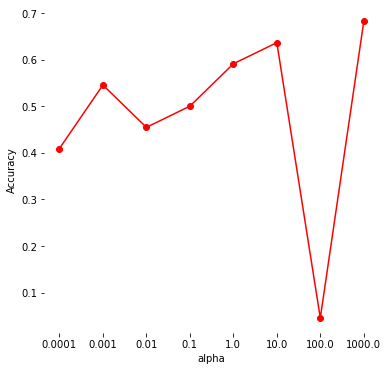

SGDClassifier(alpha=1000.0, loss='log', n_jobs=-1) 0.6818181818181818


In [112]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           x_train, y_train, x_test, y_test, 
           metric = accuracy_score,
           scoreLabel = "Accuracy")

print(bestModel, bestScore)

In [113]:
scd_hyperparameters = (bestModel.alpha, bestModel.loss, bestModel.n_jobs)

In [114]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_test, y_test)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 16


In [115]:
knn_hyperparameters = (best_model.best_estimator_.get_params()["leaf_size"], best_model.best_estimator_.get_params()["p"], best_model.best_estimator_.get_params()["n_neighbors"])

In [116]:
dec_tree = DecisionTreeClassifier()
std_slc = StandardScaler()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,len(x_train)+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict( dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [117]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]})

In [118]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 2
DecisionTreeClassifier(criterion='entropy', max_depth=2)


In [119]:
dtree_hyperparameters = (clf_GS.best_estimator_.get_params()['dec_tree__criterion'], clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])

In [120]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_test, y_test)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
grid_search.best_params_["max_depth"]

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

In [ ]:
randomforest_hypterparameters = (grid_search.best_params_["max_depth"],grid_search.best_params_["max_features"],grid_search.best_params_["min_samples_leaf"],grid_search.best_params_["min_samples_split"])

In [ ]:
def model_creation(x, Y, average, svmp, stockhastic, knn, dtree, rfm):
    scaler = StandardScaler()
    scaled_x = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(scaled_x, Y, test_size=0.33, random_state=42)
    
    svm_model           = svm.SVC(C=svmp[0], gamma=svmp[1])
    stockhastic_model   = SGDClassifier(alpha=stockhastic[0], loss=stockhastic[1], n_jobs=stockhastic[2])
    knn_model           = KNeighborsClassifier(leaf_size= knn[0],  p= knn[1],n_neighbors= knn[2])
    decisiontree_model  = DecisionTreeClassifier(criterion=dtree[0], max_depth=dtree[1])
    random_forest_model = RandomForestClassifier(max_depth=rfm[0], max_features=rfm[1], min_samples_leaf=rfm[2], min_samples_split=rfm[3], n_estimators=300)
    
    svm_model.fit(x_train, y_train)
    stockhastic_model.fit(x_train, y_train)
    knn_model.fit(x_train, y_train)
    decisiontree_model.fit(x_train, y_train)
    random_forest_model.fit(x_train, y_train)
    
    prediction_svm_model          = svm_model.predict(x_test)
    prediction_stockhastic_model  = stockhastic_model.predict(x_test)
    prediction_knn_model          = knn_model.predict(x_test)
    prediction_decisiontree_model = decisiontree_model.predict(x_test)
    prediction_random_forest_model= random_forest_model.predict(x_test)
    
    f1_score_svm_model           = f1_score(y_test, prediction_svm_model,          average=average)
    f1_score_stockhastic_model   = f1_score(y_test, prediction_stockhastic_model,  average=average)
    f1_score_knn_model           = f1_score(y_test, prediction_knn_model,          average=average)
    f1_score_decisiontree_model  = f1_score(y_test, prediction_decisiontree_model, average=average)
    f1_score_random_forest_model = f1_score(y_test, prediction_random_forest_model,average=average)
    
    precision_score_svm_model           = precision_score(y_test, prediction_svm_model          , average=average)
    precision_score_stockhastic_model   = precision_score(y_test, prediction_stockhastic_model  , average=average)
    precision_score_knn_model           = precision_score(y_test, prediction_knn_model          , average=average)
    precision_score_decisiontree_model  = precision_score(y_test, prediction_decisiontree_model , average=average)
    precision_score_random_forest_model= precision_score(y_test, prediction_random_forest_model , average=average)
    
    accuracy_score_svm_model           = accuracy_score(y_test, prediction_svm_model          )
    accuracy_score_stockhastic_model   = accuracy_score(y_test, prediction_stockhastic_model  )
    accuracy_score_knn_model           = accuracy_score(y_test, prediction_knn_model          )
    accuracy_score_decisiontree_model  = accuracy_score(y_test, prediction_decisiontree_model )
    accuracy_score_random_forest_model = accuracy_score(y_test, prediction_random_forest_model)
    
    scores= [[f1_score_svm_model, precision_score_svm_model, accuracy_score_svm_model]\
            ,[f1_score_stockhastic_model, precision_score_stockhastic_model, accuracy_score_stockhastic_model]\
            ,[f1_score_knn_model, precision_score_knn_model, accuracy_score_knn_model]\
            ,[f1_score_decisiontree_model, precision_score_decisiontree_model, accuracy_score_decisiontree_model]\
            ,[f1_score_random_forest_model,precision_score_random_forest_model, accuracy_score_random_forest_model]]
    temp_df = pd.DataFrame(scores)
    temp_df.columns = ["F1", "Precision", "Accuracy"]
    temp_df = temp_df.T
    temp_df.columns=["SVM", "Stockhastic", "KNN", "DecisionTree", "Random Forest"]
    return temp_df.T
    

In [ ]:
results_with_graph = model_creation(full_df,Y, averages[0], svm_hyperparameters, scd_hyperparameters, knn_hyperparameters, dtree_hyperparameters, randomforest_hypterparameters)

In [ ]:
results_without_graph = model_creation(market_data.iloc[50:50+graph_parameters.shape[0],1:], Y, averages[0], svm_hyperparameters, scd_hyperparameters, knn_hyperparameters, dtree_hyperparameters, randomforest_hypterparameters)

In [ ]:
print(results_with_graph) #pca 5
print(results_without_graph)
print(results_with_graph-results_without_graph)

In [96]:
print(results_with_graph) #pca 10
print(results_without_graph)
print(results_with_graph-results_without_graph)

                     F1  Precision  Accuracy
SVM            0.434343   0.424242  0.636364
Stockhastic    0.462222   0.464286  0.681818
KNN            0.452489   0.460317  0.681818
DecisionTree   0.397661   0.390313  0.590909
Random Forest  0.415873   0.462745  0.636364
                     F1  Precision  Accuracy
SVM            0.415873   0.462745  0.636364
Stockhastic    0.443350   0.537037  0.681818
KNN            0.307018   0.301994  0.454545
DecisionTree   0.398291   0.526316  0.636364
Random Forest  0.369883   0.364672  0.545455
                     F1  Precision  Accuracy
SVM            0.018470  -0.038503  0.000000
Stockhastic    0.018872  -0.072751  0.000000
KNN            0.145471   0.158323  0.227273
DecisionTree  -0.000630  -0.136002 -0.045455
Random Forest  0.045990   0.098073  0.090909


In [64]:
print(results_with_graph) #pca 40
print(results_without_graph)
print(results_with_graph-results_without_graph)

                     F1  Precision  Accuracy
SVM            0.334795   0.327635  0.500000
Stockhastic    0.222222   0.166667  0.500000
KNN            0.462222   0.464286  0.681818
DecisionTree   0.426848   0.438095  0.636364
Random Forest  0.361991   0.368254  0.545455
                     F1  Precision  Accuracy
SVM            0.443350   0.537037  0.681818
Stockhastic    0.415873   0.462745  0.636364
KNN            0.398519   0.398810  0.590909
DecisionTree   0.398291   0.526316  0.636364
Random Forest  0.369883   0.364672  0.545455
                     F1  Precision  Accuracy
SVM           -0.108554  -0.209402 -0.181818
Stockhastic   -0.193651  -0.296078 -0.136364
KNN            0.063704   0.065476  0.090909
DecisionTree   0.028557  -0.088221  0.000000
Random Forest -0.007892   0.003582  0.000000


In [32]:
print(results_with_graph) #pca 20
print(results_without_graph)
print(results_with_graph-results_without_graph)

                     F1  Precision  Accuracy
SVM            0.372742   0.435185  0.590909
Stockhastic    0.455247   0.486111  0.681818
KNN            0.432749   0.427350  0.636364
DecisionTree   0.312821   0.355556  0.454545
Random Forest  0.415873   0.462745  0.636364
                     F1  Precision  Accuracy
SVM            0.443350   0.537037  0.681818
Stockhastic    0.465217   0.455556  0.681818
KNN            0.334815   0.333333  0.500000
DecisionTree   0.323529   0.344322  0.454545
Random Forest  0.334815   0.333333  0.500000
                     F1  Precision  Accuracy
SVM           -0.070608  -0.101852 -0.090909
Stockhastic   -0.009970   0.030556  0.000000
KNN            0.097934   0.094017  0.136364
DecisionTree  -0.010709   0.011233  0.000000
Random Forest  0.081058   0.129412  0.136364
